In [1]:
# plot graphs
import matplotlib.pyplot as plt

# create sample dataset
from sklearn.datasets import make_blobs

# calculates centroids based on k-means
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
# create data set
values, centers = make_blobs(n_samples = 200,  # amount of elements
                  n_features = 2,              # amount of features (2 = bidimensional)
                  centers = 4,                 # different centers
                  cluster_std = 0.8,           # std deviation of the clusters
                  shuffle = False, 
                  random_state = 0)

# Value is an array of 2 pairs (in this case) of value
# centers is an array of the different centers

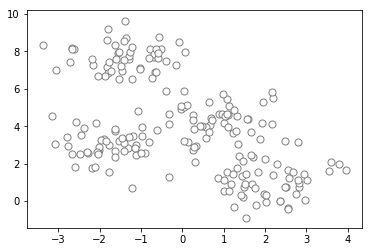

In [3]:
# scatterplot of the dataset

plt.scatter(values[:,0],
            values[:,1],
            c = "white",
            marker = "o",
            edgecolor = "grey",
            s = 50);

In [4]:
# creates the model K-means

km = KMeans (n_clusters = 4,   # in the K-means needs to define the amount of clusters, calculate with elbow, below 
             init = "random",
             n_init = 10,      # how many times we initiate to find the best centers
             max_iter = 300,   # how many is it the maximum of iterations to find the centers (till converge)
             tol = 1e-04,      # tolerance
             random_state = 0)

# fit the model with the actual values
y_km = km.fit_predict(values)

In [5]:
# could be compared with the centers
print(y_km)
print(centers)

[2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3
 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


- regardless of the actual value, it seems to allocate correctly the clusters with the given data.
- increasing the cluster_std in generated data, makes more difficult to allocated equally the clusters

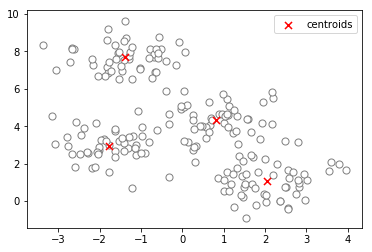

In [6]:
# plot the sample
plt.scatter(values[:,0],
            values[:,1],
            c = "white",
            marker = "o",
            edgecolor = "grey",
            s = 50);

# plot centroids
plt.scatter(km.cluster_centers_[:,0], # every elements of the array (of 2 elements), the first element
            km.cluster_centers_[:,1], # every elements of the array (of 2 elements), the second element
            s = 50,                   # size
            c = "red",                # color
            marker = "x",             # symbol
            label = "centroids");     # label

plt.legend(scatterpoints = 1);

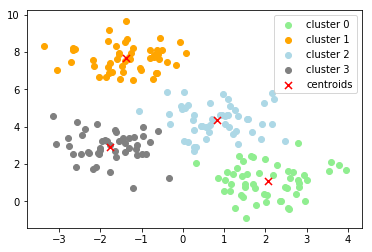

In [7]:
# for plotting the clusters in different colours, needs to make n different plots

plt.scatter(values[y_km == 0,0],
            values[y_km == 0,1],
            c = "lightgreen",
            marker = "o",
            label = "cluster 0");

plt.scatter(values[y_km == 1,0],
            values[y_km == 1,1],
            c = "orange",
            marker = "o",
            label = "cluster 1");

plt.scatter(values[y_km == 2,0],
            values[y_km == 2,1],
            c = "lightblue",
            marker = "o",
            label = "cluster 2");

plt.scatter(values[y_km == 3,0],
            values[y_km == 3,1],
            c = "grey",
            marker = "o",
            label = "cluster 3");


# plot centroids
plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s = 50,                  
            c = "red",                
            marker = "x",             
            label = "centroids");     

plt.legend(scatterpoints = 1);

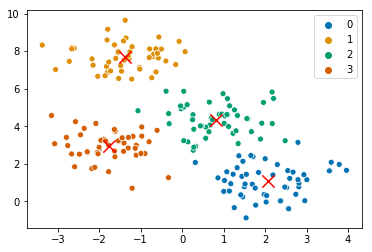

In [8]:

import seaborn as sns

# with seaborn can plot the scatterplot with different colour for clusters without repeating n-times the graph
# the legend might need to be treated differently
ax = sns.scatterplot(x = values[:,0],
                     y = values[:,1],
                     hue = y_km,              # color category according to the fit model      
                     palette = "colorblind"); # palette set the combination of colors

# plot centroids
plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s = 150,                  
            c = "red",                
            marker = "x",             
            label = "centroids");


## "Elbow" calculation

inertia: value that represents "how far the points are" from the centroids. Corresponds to the Error Sum of Squares (SSE) and ideally we want to minize that value.

the more centroids (n_clusters), lower will be the inertia, however, we can observe that the in certain point additional clusters don't improve "significantly" the value of the inertia.

This is known as "find the elbow" in the graph, and it is mostly a subjective interpretation.

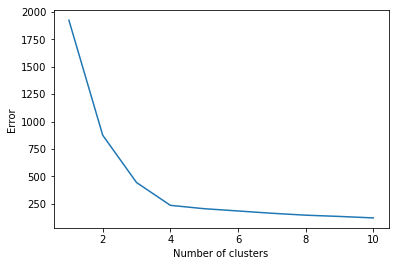

In [9]:
# create an empty list which will gather the errors, depending the amount of clusters
error = []

# for loop, calculates the different values of inertia with different n_clusters (eg. to 20).
# the rest of parameter remain the same

for i in range(1,11):
    km = KMeans (n_clusters = i,   
                 init = "random",
                 n_init = 10,      
                 max_iter = 300,   
                 tol = 1e-04,      
                 random_state = 0)
    km.fit(values)
    error.append(km.inertia_)

# plot the result and "find the elbow"

plt.plot(range(1,11), error);
plt.xlabel("Number of clusters");
plt.ylabel("Error");

find the "elbow" with 4 clusters

Explore in how to calculate the silhouette score

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html